In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Carga de Datos

In [2]:
# Cargar los datos
df = pd.read_csv('data/stroke_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Análisis Preliminar
* Explorar tipo de datos
* Valores faltantes
* Valores nulos
* Valores únicos
* Errores tipográficos

In [3]:
# Información general del dataset
print("\n ==== Información General del Dataset ===\n")
print(df.info())

# Estadísticas descriptivas
print("\n ==== Estadísticas Descriptivas ====\n")
print(df.describe())

# Verificar valores nulos
print("\n ==== Valores Nulos por Columan ====\n")
print(df.isnull().sum())

# Distribución de la variable objetivo (stroke)
print("\n ==== Distribución de la Variable Objetivo ====\n")
print(df['stroke'].value_counts(normalize=True))


 ==== Información General del Dataset ===

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None

 ==== Estadísticas Descriptivas ====

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000

Este código analizará cada columna del dataset y mostrará:

* El nombre de la columna
* El tipo de datos
* El número de valores únicos
* Para columnas numéricas: el valor mínimo y máximo
* Los valores únicos (para todas las columnas)
* El número de valores nulos en cada columna

In [4]:
# Función para obtener un resumen de los valores únicos
def get_unique_values_summary(df):
    summary = {}
    for column in df.columns:
        unique_values = df[column].unique()
        summary[column] = {
            'tipo': str(df[column].dtype),
            'n_unicos': len(unique_values),
            'valores': sorted(unique_values.tolist())
        }
        if df[column].dtype in ['int64', 'float64']:
            summary[column]['min'] = np.min(unique_values)
            summary[column]['max'] = np.max(unique_values)
    return summary

# Obtener y mostrar el resumen
summary = get_unique_values_summary(df)

for column, info in summary.items():
    print(f"\nColumna: {column}")
    print(f"Tipo de datos: {info['tipo']}")
    print(f"Número de valores únicos: {info['n_unicos']}")
    if 'min' in info:
        print(f"Valor mínimo: {info['min']}")
        print(f"Valor máximo: {info['max']}")
    print(f"Valores únicos: {info['valores']}")
    print("-" * 50)


Columna: gender
Tipo de datos: object
Número de valores únicos: 2
Valores únicos: ['Female', 'Male']
--------------------------------------------------

Columna: age
Tipo de datos: float64
Número de valores únicos: 104
Valor mínimo: 0.08
Valor máximo: 82.0
Valores únicos: [0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0]
--------------------------------------------------

Columna: hypertension
Tipo de datos: int64
Número de valores ú

In [5]:
# Contar los valores 'Unknown' en la columna 'smoking_status'
unknown_count = df['smoking_status'].value_counts()['Unknown']

print(f"Número de valores 'Unknown' en 'smoking_status': {unknown_count}")

# Mostrar la distribución completa de valores en 'smoking_status'
print("\nDistribución de valores en 'smoking_status':")
print(df['smoking_status'].value_counts())

# Calcular el porcentaje de 'Unknown'
total_records = len(df)
unknown_percentage = (unknown_count / total_records) * 100

print(f"\nPorcentaje de valores 'Unknown': {unknown_percentage:.2f}%")

# Verificar valores nulos
null_count = df['smoking_status'].isnull().sum()
print(f"\nNúmero de valores nulos en 'smoking_status': {null_count}")

Número de valores 'Unknown' en 'smoking_status': 1500

Distribución de valores en 'smoking_status':
smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

Porcentaje de valores 'Unknown': 30.11%

Número de valores nulos en 'smoking_status': 0


        * Valores nulos:

        Identificar columnas con valores nulos y decidir la estrategia de imputación (media, mediana, moda, o un valor específico dependiendo de la naturaleza de la variable).


        * Valores atípicos:

        Para variables numéricas, verificar si hay valores extremos que puedan ser errores de datos o valores atípicos legítimos.


        * Discretización:

        Para 'age' y posiblemente 'avg_glucose_level', considerar si la discretización en categorías podría ser beneficiosa para el modelo.:


# Análisis Gráfico
* Distribución de las variables
* Detección de Outliers
* Relaciones entre varibles

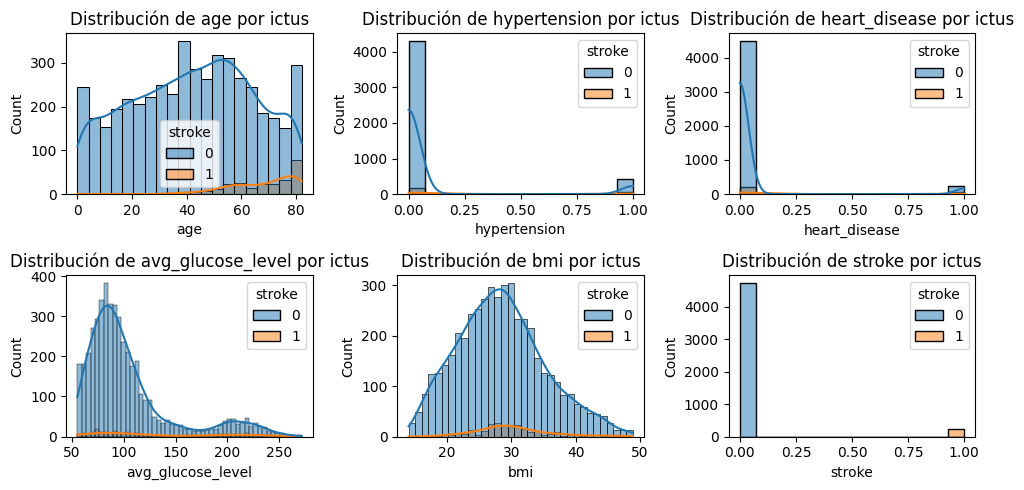

In [6]:
# Separar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Visualizaciones para variables numéricas
plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=col, hue='stroke', kde=True)
    plt.title(f'Distribución de {col} por ictus')
plt.tight_layout()
plt.show()

        Observaciones:
        * La variable objetivo 'stroke' está desbalanceada, lo que requerirá técnicas de balanceo.
        * Hay una relación entre la edad y la probabilidad de ictus.
        * Los niveles altos de glucosa y BMI parecen estar asociados con mayor riesgo de ictus.
        * Existen diferencias en la distribución de ictus según el género y tipo de trabajo.


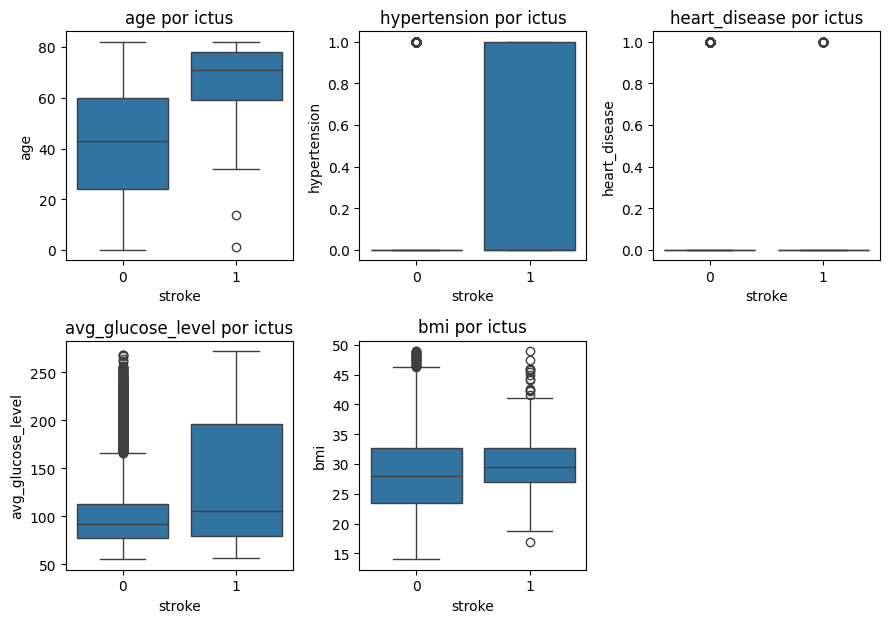

In [13]:
# Boxplots para variables numéricas por ictus
numeric_cols_without_stroke = [col for col in numeric_cols if col != 'stroke']
num_cols = len(numeric_cols_without_stroke)
rows = (num_cols + 1) // 2  # Redondear hacia arriba
cols = 3

plt.figure(figsize=(9, 3 * rows))
for i, col in enumerate(numeric_cols_without_stroke):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x='stroke', y=col)
    plt.title(f'{col} por ictus')
plt.tight_layout()
plt.show()

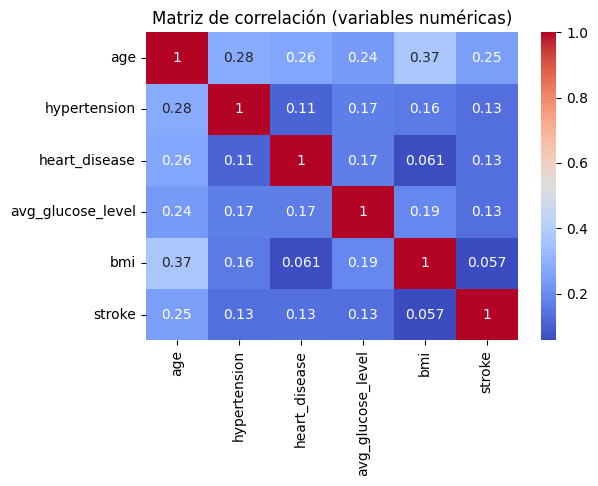

In [14]:
# Matriz de correlación para variables numéricas
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación (variables numéricas)')
plt.show()

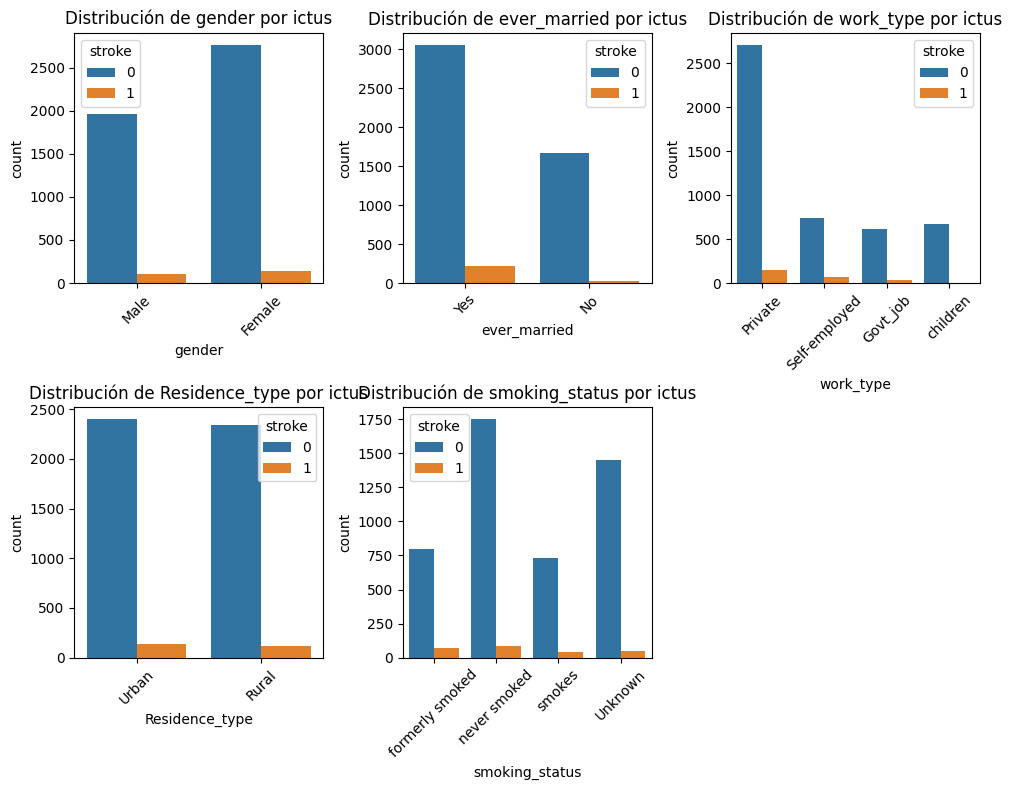

In [15]:
# Visualizaciones para variables categóricas
plt.figure(figsize=(10, 8))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df, x=col, hue='stroke')
    plt.title(f'Distribución de {col} por ictus')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

        Observaciones:
        Las variables categóricas como hipertensión, enfermedad cardíaca y el estado de fumador muestran diferencias en la distribución entre los casos de ictus y no ictus.

# Visualizaciones para buscar relaciones entre las variables

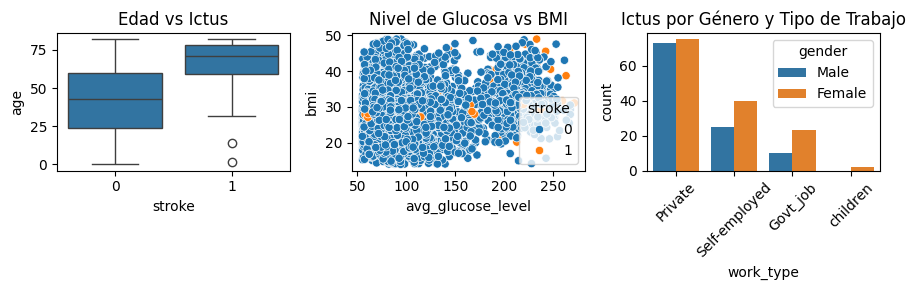

In [17]:
# Crear una figura con 3 subplots
plt.figure(figsize=(9, 3))

# Subplot 1: Distribución de edad por ictus
plt.subplot(1, 3, 1)  # 2 filas, 2 columnas, posición 1
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Edad vs Ictus')

# Subplot 2: Relación entre glucosa y BMI
plt.subplot(1, 3, 2)
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df)
plt.title('Nivel de Glucosa vs BMI')

# Subplot 3: Distribución de ictus por género y tipo de trabajo
plt.subplot(1, 3, 3)
sns.countplot(x='work_type', hue='gender', data=df[df['stroke'] == 1])
plt.title('Ictus por Género y Tipo de Trabajo')
# Rotar las etiquetas del eje x
plt.xticks(rotation=45)  # Rotar 45 grados

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

plt.show()

    Basado en este EDA, podemos observar lo siguiente:

    * La variable objetivo 'stroke' está desbalanceada, lo que requerirá técnicas de balanceo.
    * Hay una relación entre la edad y la probabilidad de ictus.
    * Los niveles altos de glucosa y BMI parecen estar asociados con mayor riesgo de ictus.
    * Existen diferencias en la distribución de ictus según el género y tipo de trabajo.


# Relación de la columnna 'smokes_status' cuando el valor es desconocido con el resto de las variables
Este código realiza las siguientes operaciones:

* Compara las distribuciones de variables numéricas (age, avg_glucose_level, bmi) entre los registros con smoking_status conocido y desconocido.
* Compara las proporciones de variables categóricas entre los dos grupos.
* Muestra estadísticas descriptivas para ambos grupos.
* Calcula la proporción de valores 'Unknown' en smoking_status.
* Compara la tasa de ictus entre los dos grupos.

 === Comparar distribuciones para variables numéricas ===



<Figure size 900x300 with 0 Axes>

<Figure size 900x300 with 0 Axes>

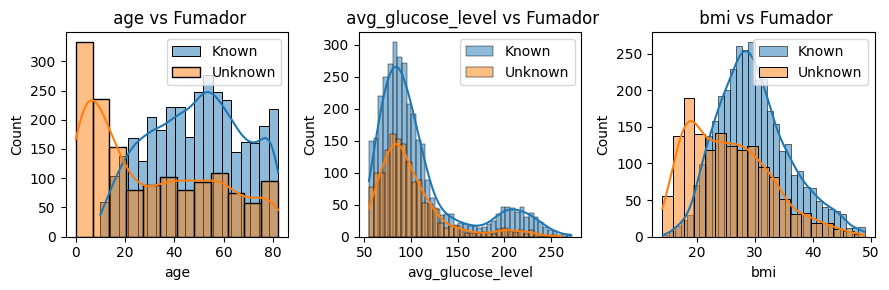

 === Comparar distribuciones para variables categóricas ===



<Figure size 900x1200 with 0 Axes>

<Figure size 900x1200 with 0 Axes>

<Figure size 900x1200 with 0 Axes>

<Figure size 900x1200 with 0 Axes>

<Figure size 900x1200 with 0 Axes>

<Figure size 900x1200 with 0 Axes>

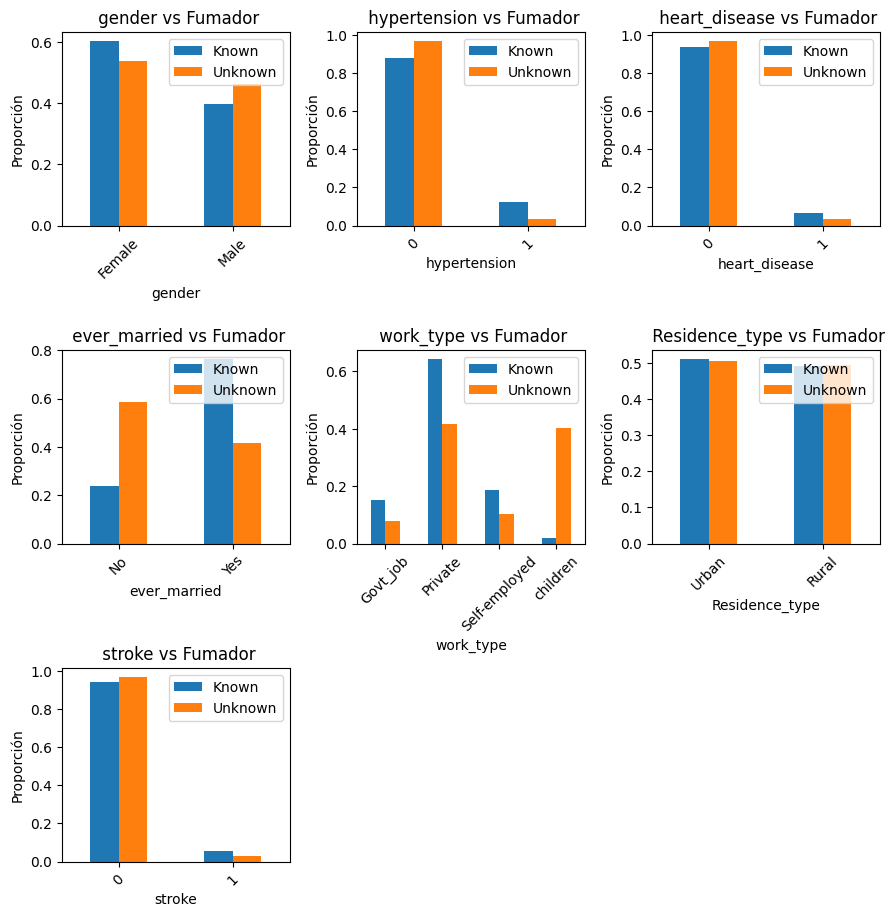

In [28]:
def compare_distributions(df, columns, figsize_numeric=(9, 3), figsize_categorical=(9, 12), rows=None, cols=None):
#def compare_distributions(df, columns, figsize=(10, 5), rows=None, cols=None):
    """
    Compara distribuciones para variables numéricas o categóricas.

    Args:
        df (pd.DataFrame): El DataFrame con los datos.
        columns (list): Una lista de columnas a comparar.
        figsize (tuple, optional): Tamaño de la figura. Defaults to (15, 12).
        rows (int, optional): Número de filas para subplots en figura única. Defaults to None.
        cols (int, optional): Número de columnas para subplots en figura única. Defaults to None.
    """
    #plt.figure(figsize=figsize_numeric)
    # plt.figure(figsize=figsize_categorical)
    # Recorrer las columnas
    for col in columns:
        # Crear figura según el tipo de columna
        if col in numeric_columns:
            plt.figure(figsize=figsize_numeric)
        else:
            plt.figure(figsize=figsize_categorical)
    
    if rows and cols:
        for i, col in enumerate(columns):

            ax = plt.subplot(rows, cols, i+1)
            if col in numeric_columns:
                sns.histplot(data=df[df['smoking_status'] != 'Unknown'], x=col, kde=True, label='Known', ax=ax)
                sns.histplot(data=df[df['smoking_status'] == 'Unknown'], x=col, kde=True, label='Unknown', ax=ax)
                plt.legend(loc='upper right')
            else:
                known = df[df['smoking_status'] != 'Unknown'][col].value_counts(normalize=True)
                unknown = df[df['smoking_status'] == 'Unknown'][col].value_counts(normalize=True)
                pd.DataFrame({'Known': known, 'Unknown': unknown}).plot(kind='bar', ax=ax)
                plt.ylabel('Proporción')
                plt.xticks(rotation=45)
            plt.title(f' {col} vs Fumador')

    plt.tight_layout()
    plt.show()

# Variables
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'stroke']

# Comparar distribuciones para variables numéricas
print(' === Comparar distribuciones para variables numéricas ===\n')
compare_distributions(df, numeric_columns, rows=1, cols=3)

# Comparar distribuciones para variables categóricas
print(' === Comparar distribuciones para variables categóricas ===\n')
compare_distributions(df, categorical_columns, rows=int(np.ceil(len(categorical_columns)/2)), cols=3)

In [29]:
# Calcular estadísticas descriptivas
print(' === Calcular estadísticas descriptivas ===\n')
print("Estadísticas descriptivas para registros con smoking_status conocido:")
print(df[df['smoking_status'] != 'Unknown'].describe())
print("\nEstadísticas descriptivas para registros con smoking_status desconocido:")
print(df[df['smoking_status'] == 'Unknown'].describe())

# Calcular la proporción de 'Unknown' en smoking_status
print(' === Calcular la proporción de "Unknown" en smoking_status ===\n')
unknown_proportion = df['smoking_status'].value_counts(normalize=True)['Unknown']
print(f"\nProporción de 'Unknown' en smoking_status: {unknown_proportion:.2%}")

# Comparar la tasa de ictus
print(' === Comparar la tasa de ictus ===\n')
stroke_rate_known = df[df['smoking_status'] != 'Unknown']['stroke'].mean()
stroke_rate_unknown = df[df['smoking_status'] == 'Unknown']['stroke'].mean()
print(f"\nTasa de ictus para smoking_status conocido: {stroke_rate_known:.2%}")
print(f"Tasa de ictus para smoking_status desconocido: {stroke_rate_unknown:.2%}")

 === Calcular estadísticas descriptivas ===

Estadísticas descriptivas para registros con smoking_status conocido:
               age  hypertension  heart_disease  avg_glucose_level  \
count  3481.000000    3481.00000    3481.000000        3481.000000   
mean     49.067509       0.12324       0.065211         108.769155   
std      18.894255       0.32876       0.246934          48.133475   
min      10.000000       0.00000       0.000000          55.120000   
25%      34.000000       0.00000       0.000000          77.450000   
50%      50.000000       0.00000       0.000000          92.490000   
75%      64.000000       0.00000       0.000000         116.250000   
max      82.000000       1.00000       1.000000         271.740000   

               bmi       stroke  
count  3481.000000  3481.000000  
mean     29.808159     0.057742  
std       6.228310     0.233288  
min      14.100000     0.000000  
25%      25.300000     0.000000  
50%      29.100000     0.000000  
75%      33.5000

        **Proporción de valores 'Unknown'**
        La proporción de 'Unknown' en smoking_status es del 30.11%, lo cual es una cantidad significativa de datos.

        **Comparación de tasas de ictus**
        Tasa de ictus para smoking_status conocido: 5.77%
        Tasa de ictus para smoking_status desconocido: 3.13%
        Hay una diferencia notable en las tasas de ictus entre los dos grupos.

        **Diferencias en variables demográficas y de salud**
        La edad media del grupo 'Unknown' (30.31 años) es considerablemente menor que la del grupo conocido (49.07 años).
        El BMI medio del grupo 'Unknown' (25.46) es menor que el del grupo conocido (29.81).
        Las tasas de hipertensión y enfermedades cardíacas son más bajas en el grupo 'Unknown'.

        **ESTRATEGIAS**
        1. No eliminar los registros 'Unknown':
        Representan casi un tercio de tu dataset, y eliminarlos podría introducir un sesgo significativo en tu modelo.
        Hay diferencias importantes en las características entre los grupos 'Known' y 'Unknown', lo que sugiere que los 'Unknown' podrían representar un subgrupo específico de la población (posiblemente más joven y saludable).

        2. Tratar 'Unknown' como una categoría separada:
        Crear una nueva categoría en 'smoking_status' para los valores 'Unknown', en lugar de intentar imputarlos.
        Esto permitirá que el modelo capture cualquier patrón específico asociado con este grupo.

        3. Crear variables adicionales:
        Añadir una variable binaria que indique si el valor de 'smoking_status' era 'Unknown' o no.
        Considera crear interacciones entre esta variable binaria y otras características importantes como la edad o el BMI.

        4. Tener en cuenta el posible sesgo:
        Al interpretar los resultados del modelo, tener en cuenta que el grupo 'Unknown' tiene una tasa de ictus más baja y características demográficas diferentes.
        Esto podría afectar la generalización de tu modelo a diferentes poblaciones.


# Preprocesamiento para predicción de ictus
* No hay valores faltantes. No se realiza ninguna imputación
* Escalado de variables numéricas: Estandarizamos las características numéricas.
* Codificación one-hot para variables categóricas.
* Aplicación de SMOTE para balancear las clases.

hypertension unique values: [0 1]
heart_disease unique values: [1 0]
stroke unique values: [1 0]
Outliers in age:
Empty DataFrame
Columns: [age]
Index: []
Outliers in avg_glucose_level:
      avg_glucose_level
0                228.69
2                171.23
3                174.12
4                186.21
11               214.09
...                 ...
4968             206.53
4970             240.69
4972             238.27
4975             215.07
4977             191.15

[602 rows x 1 columns]
Outliers in bmi:
       bmi
17    48.9
53    47.5
154   46.0
295   48.2
319   47.3
366   46.5
368   46.6
560   47.8
760   46.1
1142  48.4
1167  46.2
1411  47.5
1452  48.5
1833  48.9
2105  48.5
2116  48.7
2135  48.9
2213  46.5
2231  48.8
2453  46.0
2673  48.0
2683  46.8
2807  48.3
3067  48.3
3341  47.4
3649  47.3
3683  47.9
3755  46.2
3899  46.1
3994  46.0
4107  47.6
4154  48.8
4229  47.5
4266  46.4
4329  46.9
4382  47.1
4394  48.1
4530  47.8
4541  47.6
4577  46.3
4653  46.0
4730  47.6
4774  46.9


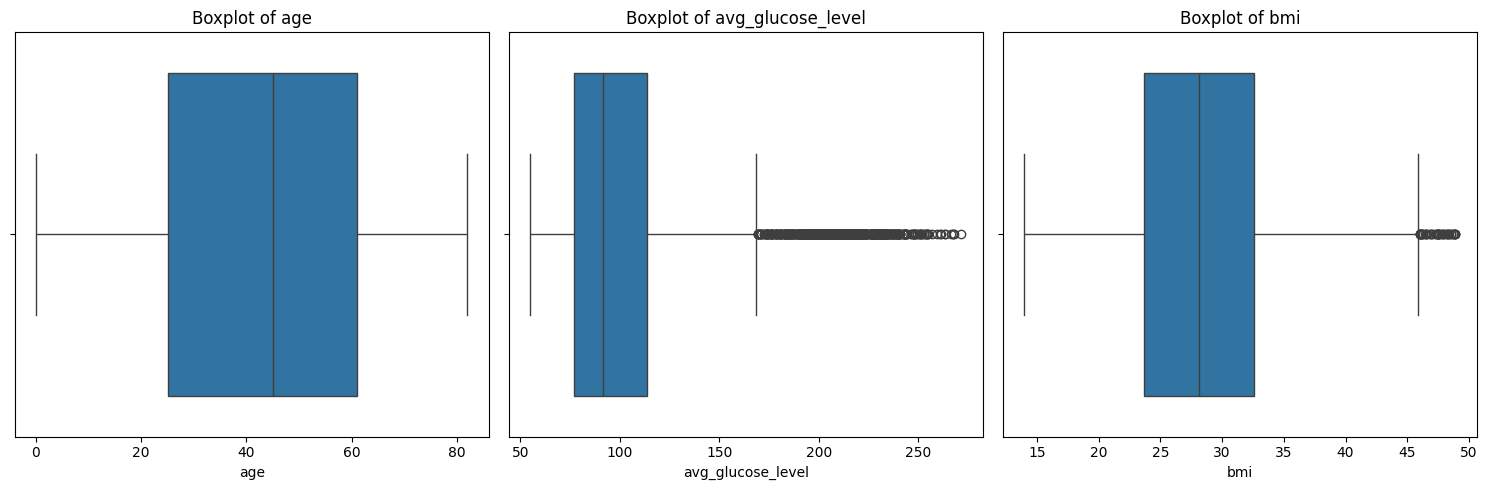

Dataset transformado guardado como 'stroke_proc.csv'


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group,glucose_level
0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,True,False,False,False,True,False,False,61-75,High
1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,True,False,False,False,False,True,False,75+,Prediabetes
2,49.0,0,0,1,1,171.23,34.4,1,True,False,False,True,False,False,False,False,False,True,46-60,Diabetes
3,79.0,1,0,1,0,174.12,24.0,1,True,False,False,False,True,False,False,False,True,False,75+,Diabetes
4,81.0,0,0,1,1,186.21,29.0,1,False,True,False,True,False,False,False,True,False,False,75+,Diabetes


In [30]:
# Variables categóricas
def encode_categorical(df):
    # One-hot encoding para variables con múltiples categorías
    df = pd.get_dummies(df, columns=['gender', 'work_type', 'smoking_status'])
    
    # Codificación binaria para variables binarias
    df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
    df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})
    
    return df

# Variables binarias
def check_binary(df, columns):
    for col in columns:
        unique_values = df[col].unique()
        print(f"{col} unique values: {unique_values}")

# Variables numéricas continuas
def normalize_continuous(df, columns):
    for col in columns:
        df[f'{col}_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

# Valores atípicos
def detect_outliers(df, columns):
    n_cols = len(columns)
    plt.figure(figsize=(5*n_cols, 5))
    for i, col in enumerate(columns, 1):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Outliers in {col}:")
        print(outliers[[col]])
        
        plt.subplot(1, n_cols, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()


# Discretización
def discretize_age(df):
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 75, 100], 
                            labels=['0-18', '19-30', '31-45', '46-60', '61-75', '75+'])
    return df

def discretize_glucose(df):
    df['glucose_level'] = pd.cut(df['avg_glucose_level'], bins=[0, 100, 125, 200, 300],
                                labels=['Normal', 'Prediabetes', 'Diabetes', 'High'])
    return df

# Aplicar las funciones
df_proc = df.copy()
df_proc = encode_categorical(df_proc)
check_binary(df_proc, ['hypertension', 'heart_disease', 'stroke'])
df_proc = normalize_continuous(df_proc, ['age', 'avg_glucose_level', 'bmi'])
detect_outliers(df_proc, ['age', 'avg_glucose_level', 'bmi'])
df_proc = discretize_age(df_proc)
df_proc = discretize_glucose(df_proc)

# Guardar el dataset transformado
df_proc.to_csv('data/stroke_proc.csv', index=False)
print("Dataset transformado guardado como 'stroke_proc.csv'")

# Mostrar las primeras filas del dataframe procesado
df_proc.head(5)

Columnas numéricas:
['age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke']

Columnas categóricas:
['age_group', 'glucose_level']


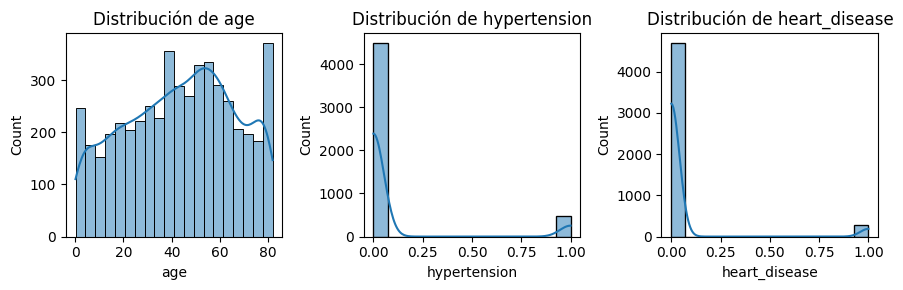

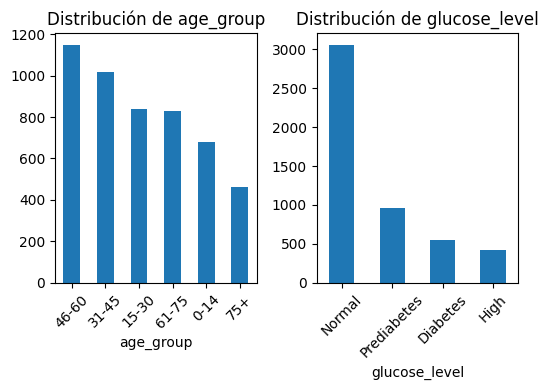

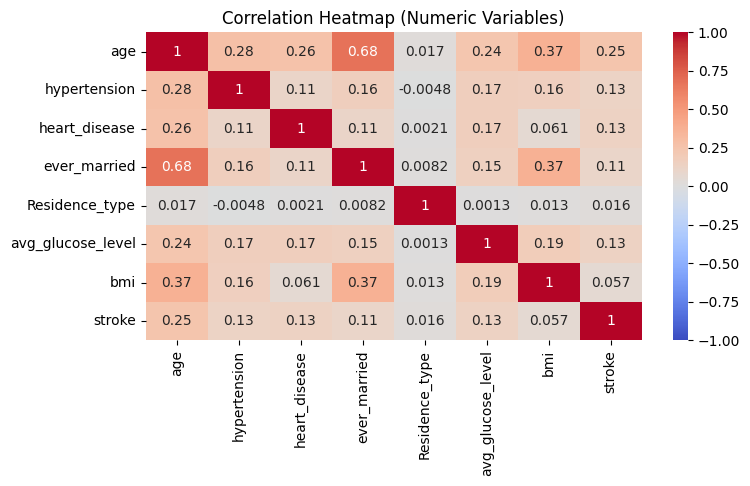

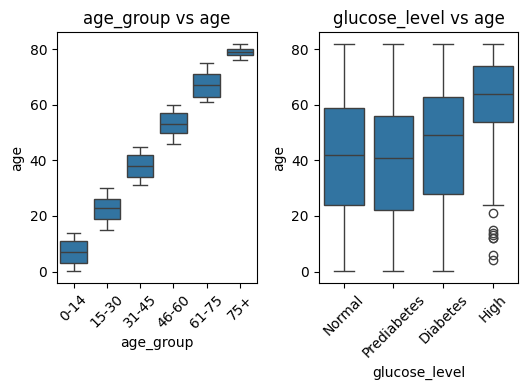

In [34]:
# Seleccionar variables numéricas y categóricas
numeric_columns = df_proc.select_dtypes(include=[np.number]).columns
categorical_columns = df_proc.select_dtypes(include=['object', 'category']).columns

print("Columnas numéricas:")
print(numeric_columns.tolist())
print("\nColumnas categóricas:")
print(categorical_columns.tolist())

# Visualización de variables numéricas
plt.figure(figsize=(9, 3))
for i, col in enumerate(numeric_columns[:3], 1):  # Mostramos solo las primeras 3 para este ejemplo
    plt.subplot(1, 3, i)
    sns.histplot(df_proc[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

# Visualización de variables categóricas
plt.figure(figsize=(8, 4))
for i, col in enumerate(categorical_columns[:3], 1):  # Mostramos solo las primeras 3 para este ejemplo
    plt.subplot(1, 3, i)
    df_proc[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matriz de correlación para variables numéricas
correlation_matrix = df_proc[numeric_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Variables)')
plt.show()

# Análisis de relación entre variables categóricas y numéricas
plt.figure(figsize=(8, 4))
for i, cat_col in enumerate(categorical_columns[:3], 1):  # Mostramos solo las primeras 3 para este ejemplo
    plt.subplot(1, 3, i)
    sns.boxplot(x=cat_col, y='age', data=df_proc)
    plt.title(f'{cat_col} vs age')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from scipy.sparse import csr_matrix

In [38]:
print(df_proc.columns)
print(df_proc.info())

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female',
       'gender_Male', 'work_type_Govt_job', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'age_group',
       'glucose_level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   age                             4981 non-null   float64 
 1   hypertension                    4981 non-null   int64   
 2   heart_disease                   4981 non-null   int64   
 3   ever_married                    4981 non-null   int64   
 4   Residence_type                  4981 non-null   int64   
 5   

In [37]:
# Make sure 'stroke' is in df_proc
if 'stroke' in df_proc.columns:
    X = df_proc.drop('stroke', axis=1)
    y = df_proc['stroke']
else:
    print("'stroke' column not found in the dataframe")
    print("Available columns:", df_proc.columns)

In [39]:
# Define numeric and categorical features based on data types
numeric_features = X.select_dtypes(include=[np.number]).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi'],
      dtype='object')
Categorical features: Index(['age_group', 'glucose_level'], dtype='object')


In [40]:
# Crear pipelines para características numéricas y categóricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Aplicar preprocesamiento
X_preprocessed = preprocessor.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

print("Forma de X después del preprocesamiento:", X_balanced.shape)
print("Distribución de clases después de SMOTE:", pd.Series(y_balanced).value_counts(normalize=True))


Forma de X después del preprocesamiento: (9466, 17)
Distribución de clases después de SMOTE: stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


In [41]:
# Convertir X_balanced a DataFrame
if isinstance(X_balanced, csr_matrix):
    X_balanced = X_balanced.toarray()

In [44]:
print(preprocessor.named_transformers_.keys())


dict_keys(['num', 'cat', 'remainder'])


In [46]:
# Obtener los nombres de las características después del preprocesamiento
feature_names = (numeric_features.tolist() + 
                preprocessor.named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_features).tolist())

In [48]:
# Crear un nuevo DataFrame con los datos balanceados
df_balanced = pd.DataFrame(X_balanced, columns=feature_names)

# Añadir la variable objetivo
df_balanced['stroke'] = y_balanced

# Guardar el nuevo dataset balanceado
df_balanced.to_csv('data/stroke_balanced.csv', index=False)
print("Dataset balanceado guardado como 'stroke_dbalanced.csv'")

# Mostrar las primeras filas del nuevo dataset
df_balanced.head(5)

Dataset balanceado guardado como 'stroke_dbalanced.csv'


,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group_0-14,age_group_15-30,age_group_31-45,age_group_46-60,age_group_61-75,age_group_75+,glucose_level_Diabetes,glucose_level_High,glucose_level_Normal,glucose_level_Prediabetes,stroke
0,1.040584,-0.326186,4.136753,0.720137,0.983473,2.723411,1.193238,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,1.614270,-0.326186,4.136753,0.720137,-1.016804,-0.000523,0.589390,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0.246250,-0.326186,-0.241735,0.720137,0.983473,1.448529,0.869222,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,1.570141,3.065738,-0.241735,0.720137,-1.016804,1.512650,-0.662492,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
4,1.658400,-0.326186,-0.241735,0.720137,0.983473,1.780895,0.073909,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
